## 1.

In [19]:
!pip install opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 166kB/s 
     |████████████████████████████████| 30.6MB 99kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [25]:
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt 
from skimage.io import imread

In [10]:
from google.colab.patches import cv2_imshow

Enter filename: 1.pgm
[('images/1.pgm', 160), ('images/d8.pgm', 1), ('images/d7.pgm', 1), ('images/c3.pgm', 1), ('images/a10.pgm', 0), ('images/a8.pgm', 0), ('images/c9.pgm', 0), ('images/d10.pgm', 0), ('images/d3.pgm', 0), ('images/c4.pgm', 0), ('images/c5.pgm', 0), ('images/c7.pgm', 0), ('images/e3.pgm', 0), ('images/e4.pgm', 0), ('images/5.pgm', 0), ('images/e10.pgm', 0), ('images/d9.pgm', 0), ('images/a5.pgm', 0), ('images/8.pgm', 0), ('images/c10.pgm', 0), ('images/e5.pgm', 0), ('images/e7.pgm', 0), ('images/c2.pgm', 0), ('images/6.pgm', 0), ('images/a4.pgm', 0), ('images/d5.pgm', 0), ('images/e6.pgm', 0), ('images/2.pgm', 0), ('images/a9.pgm', 0), ('images/4.pgm', 0), ('images/e2.pgm', 0), ('images/c8.pgm', 0), ('images/d2.pgm', 0), ('images/1_dark.pbm', 0), ('images/a3.pgm', 0), ('images/e8.pgm', 0), ('images/a7.pgm', 0), ('images/10.pgm', 0), ('images/1-r.jpg', 0), ('images/c1.pgm', 0), ('images/a1.pgm', 0), ('images/c6.pgm', 0), ('images/d6.pgm', 0), ('images/1_guass.jpg', 0),

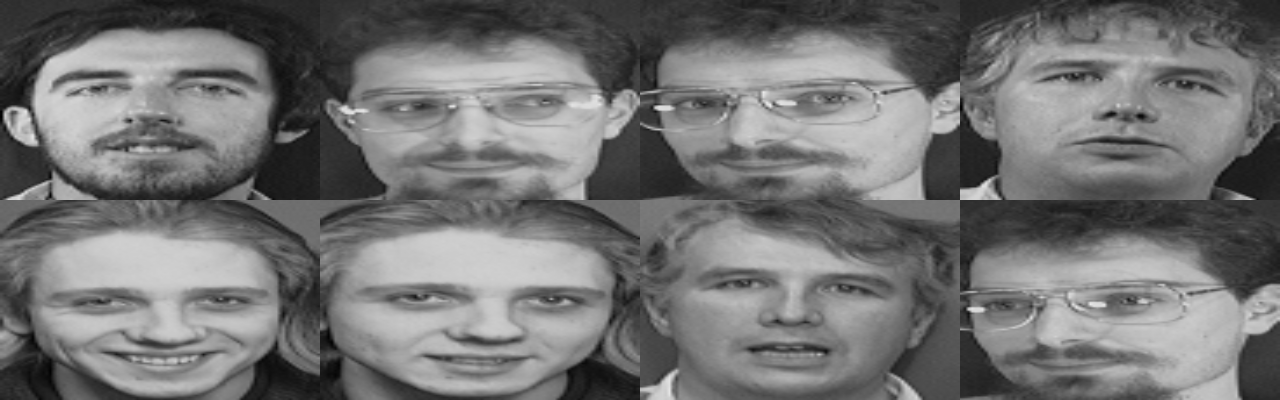

In [12]:
import cv2
import numpy as np
import glob
import os
#from tkinter import *
#import tkinter, tkinter.constants, tkinter.filedialog

closestDistance = 99999999
mostSimilarImage = ""



def distanceSift(des1,des2):
    ### Filling lines of code to compute distance between two 
    ### descriptors (des1 and des2).
    FLAN_INDEX_KDTREE = 0
    index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
    search_params = dict (checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch (des1, des2,k=2)
    good_matches = []

    for m1, m2 in matches:
        if m1.distance < 0.5 * m2.distance:
            good_matches.append([m1])
    
    return  len(good_matches)

def imageToFeatureSift(filename):
    img = cv2.imread(filename, 0)
    img = cv2.resize(img, (200, 200))
    
    #### Filling SIFT detector here 
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    return descriptors

query = input("Enter filename: ")
queryFeature = imageToFeatureSift(query)

resultList = []
bf = cv2.BFMatcher()

for filename in glob.iglob('images/*.*'):
    databaseFeature = imageToFeatureSift(filename)
    dist = distanceSift(queryFeature,databaseFeature)
    resultList.append( (filename, dist) )

sortedResultList  = sorted(resultList, key=lambda x: x[1], reverse=True)
print(sortedResultList)


# Load first five Results
print( sortedResultList[0][0] )

# Concatenate two images
def imageConcat(file1,file2):
    img1 = cv2.imread(file1, 1)
    img1 = cv2.resize(img1, (320, 200))
    img2 = cv2.imread(file2, 1)
    img2 = cv2.resize(img2, (320, 200))
    both = np.hstack((img1,img2))
    return both

# Create Grid
A = imageConcat(sortedResultList[0][0], sortedResultList[1][0])
B = imageConcat(sortedResultList[2][0], sortedResultList[3][0])
both = np.hstack((A,B))
C = imageConcat(sortedResultList[4][0], sortedResultList[5][0])
D = imageConcat(sortedResultList[6][0], sortedResultList[7][0])
both2 = np.hstack((C,D))
both = np.vstack((both,both2))

# Show Image
cv2_imshow(both)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.

In [16]:
from skimage.feature import local_binary_pattern

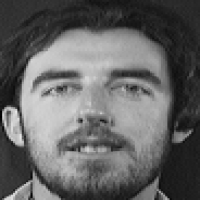

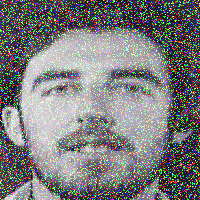

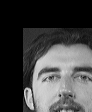

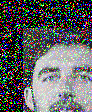

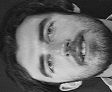

True

In [17]:
img = cv2.imread("/content/1.pgm")

img_scaled = cv2.resize(img,(200, 200), interpolation = cv2.INTER_AREA)
cv2_imshow(img_scaled) 

img = img_scaled
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

filename = "scalling.jpg"
cv2.imwrite(filename,img_gauss)

  
image = cv2.imread("/content/1.pgm")
  
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
  
cv2_imshow(img_translation)

img = img_translation
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)
filename = "translation.jpg"
cv2.imwrite(filename,img)

#rotate
img1 = cv2.imread("/content/1.pgm")
rotate1 = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2_imshow(rotate1)

filename = "rotate.jpg"
cv2.imwrite(filename,rotate1)

In [19]:
from scipy.stats import itemfreq

Enter filename: 1.pgm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:     `itemfreq` is deprecated!
    `itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


[('images/1-r.jpg', 0.15670894996776666), ('images/e9.pgm', 0.10262219545497939), ('images/e10.pgm', 0.09865627197497376), ('images/10.pgm', 0.09865627197497376), ('images/a1.pgm', 0.0977876014635802), ('images/1_guass.jpg', 0.09390881215306691), ('images/9.pgm', 0.09000716638134988), ('images/a6.pgm', 0.08885257452657179), ('images/4.pgm', 0.08536969602850884), ('images/a8.pgm', 0.0850816372668039), ('images/2.pgm', 0.08449431933568075), ('images/e3.pgm', 0.07935723029440982), ('images/a4.pgm', 0.07890839625793947), ('images/a5.pgm', 0.07832917719470824), ('images/a2.pgm', 0.07829511479013232), ('images/a3.pgm', 0.07687190644182045), ('images/e4.pgm', 0.07663967640850262), ('images/a9.pgm', 0.07549880793760916), ('images/e5.pgm', 0.0737398467587233), ('images/a7.pgm', 0.06862350180513961), ('images/d3.pgm', 0.06650672898286307), ('images/e8.pgm', 0.06459910990098855), ('images/5.pgm', 0.06411528678872143), ('images/e6.pgm', 0.06312784647047606), ('images/e7.pgm', 0.06244737784727234),

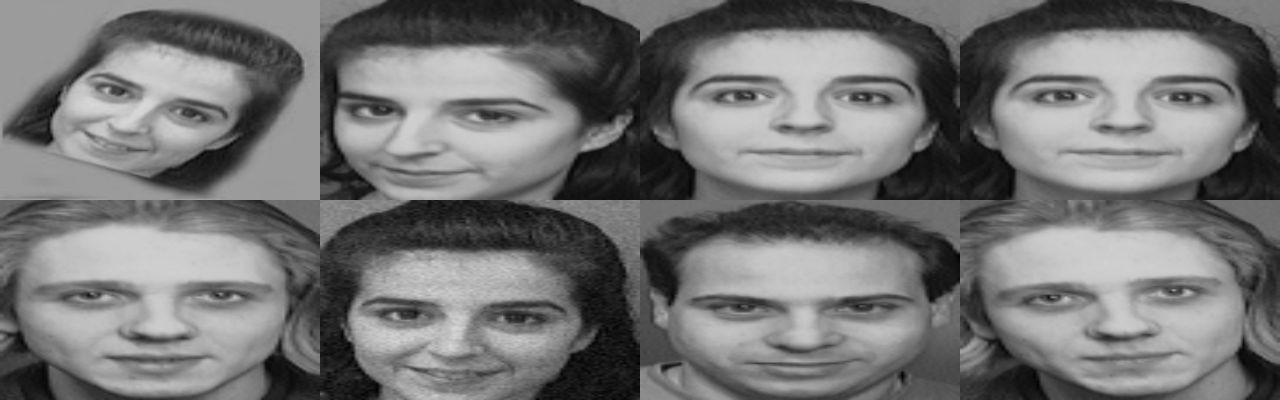

In [27]:
import cv2
import numpy as np
import glob
import os
from google.colab.patches import cv2_imshow
#from tkinter import *
#import tkinter, tkinter.constants, tkinter.filedialog

closestDistance = 99999999
mostSimilarImage = ""

def imageToFeature(filename):
    img = cv2.imread(filename, 0)
    img = cv2.resize(img, (200, 100))
    lbp = local_binary_pattern(img, 8*3, 3, method='uniform')
    x = itemfreq(lbp.ravel())
    feature = x[:, 1]/sum(x[:, 1])
    return feature

def distance(x,y):
    sumSq=0.0

    for i in range(len(x)):
        sumSq+=(x[i]-y[i])**2
    return (sumSq**0.5)

query = input("Enter filename: ")
queryFeature = imageToFeature(query)


resultList = []
bf = cv2.BFMatcher()

for filename in glob.iglob('images/*.*'):
    databaseFeature = imageToFeature(filename)
    dist = distance(queryFeature,databaseFeature)
    resultList.append( (filename, dist) )

sortedResultList  = sorted(resultList, key=lambda x: x[1], reverse=True)
print(sortedResultList)


# Load first five Results
print( sortedResultList[0][0])

# Concatenate two images
def imageConcat(file1,file2):
    img1 = cv2.imread(file1, 1)
    img1 = cv2.resize(img1, (320, 200))
    img2 = cv2.imread(file2, 1)
    img2 = cv2.resize(img2, (320, 200))
    both = np.hstack((img1,img2))
    return both

# Create Grid
A = imageConcat(sortedResultList[0][0], sortedResultList[1][0])
B = imageConcat(sortedResultList[2][0], sortedResultList[3][0])
both = np.hstack((A,B))
C = imageConcat(sortedResultList[4][0], sortedResultList[5][0])
D = imageConcat(sortedResultList[6][0], sortedResultList[7][0])
both2 = np.hstack((C,D))
both = np.vstack((both,both2))

# Show Image
cv2_imshow(both)
cv2.waitKey(0)
cv2.destroyAllWindows()

From the lab result the sift method is better than lbp because sift method is more accuracy in memorization than lpb 